# Importing libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = 'spam.csv'

In [3]:
import chardet
with open(df, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.7270322499829184, 'language': ''}

In [4]:
new_df=pd.read_csv('spam.csv',encoding = 'Windows-1252')

In [5]:
new_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
new_df.shape

(5572, 5)

# Data Cleaning and EDA.

In [8]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
v1            5572 non-null object
v2            5572 non-null object
Unnamed: 2    50 non-null object
Unnamed: 3    12 non-null object
Unnamed: 4    6 non-null object
dtypes: object(5)
memory usage: 217.7+ KB


In [9]:
new_df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [10]:
new_df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
new_df.rename(columns={'v1':'Target', 'v2':'Text'}, inplace=True)

In [12]:
new_df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
from sklearn.preprocessing import LabelEncoder
LB = LabelEncoder()

In [14]:
new_df['Target'] = LB.fit_transform(new_df['Target'])

In [15]:
new_df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
new_df.isnull().sum()

Target    0
Text      0
dtype: int64

In [17]:
new_df.duplicated().sum()

403

In [18]:
new_df = new_df.drop_duplicates(keep='first')

In [19]:
new_df.duplicated().sum()

0

In [20]:
#Exploratory Data Analysis.

In [21]:
new_df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

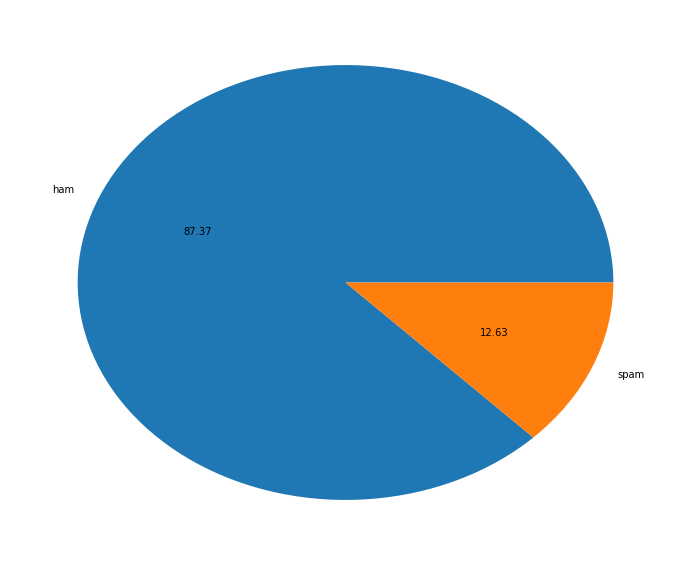

In [22]:
plt.figure(figsize=(12,10))
plt.pie(new_df['Target'].value_counts(), labels=['ham','spam'], autopct='%0.2f')
plt.show()

In [23]:
!pip install nltk

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 21.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [24]:
import nltk

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mehul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Feature Extraction.

In [26]:
new_df['num_characters'] = new_df['Text'].apply(len)

In [27]:
new_df['num_words'] = new_df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [28]:
new_df.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
new_df['num_sent'] = new_df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
new_df.head()

,Target,Text,num_characters,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
new_df[['num_characters', 'num_words', 'num_sent']].describe()

,num_characters,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.286129,1.961308
std,58.236293,13.226400,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,219.000000,38.000000


# Ham messages.
Average characters and words for ham messages are less.

In [33]:
new_df[new_df['Target'] == 0][['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,16.957484,1.815545
std,56.358207,13.394052,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,219.000000,38.000000


# Spam messages.
average characters and words for spam messages are high.

In [35]:
new_df[new_df['Target'] == 1][['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.474732,2.969372
std,30.137753,6.893007,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,44.000000,9.000000


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


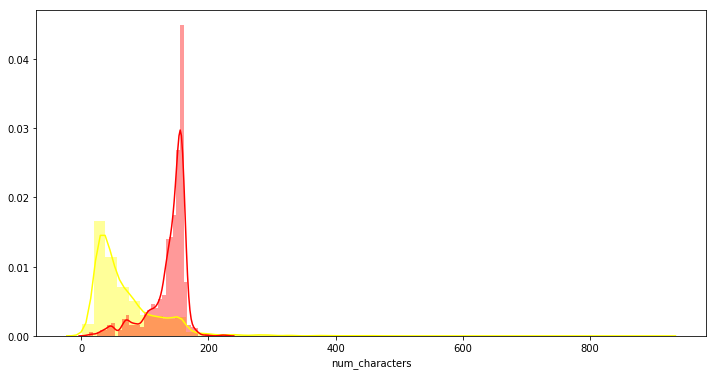

In [36]:
plt.figure(figsize=(12,6))
sns.distplot(new_df[new_df['Target'] == 0]['num_characters'],color='yellow')
sns.distplot(new_df[new_df['Target'] == 1]['num_characters'],color='red')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


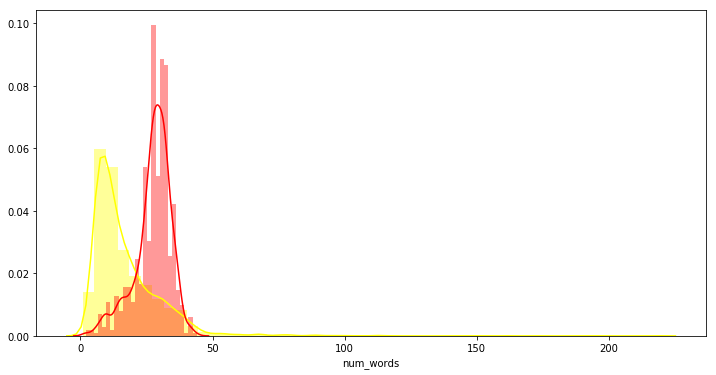

In [37]:
plt.figure(figsize=(12,6))
sns.distplot(new_df[new_df['Target'] == 0]['num_words'],color='yellow')
sns.distplot(new_df[new_df['Target'] == 1]['num_words'],color='red')

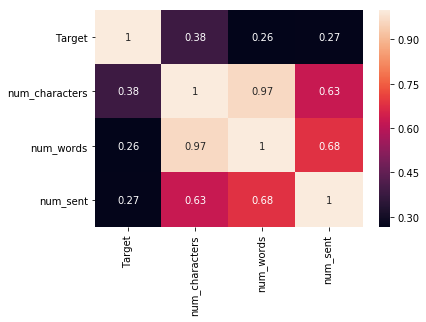

In [38]:
sns.heatmap(new_df.corr(),annot=True)

In [40]:
import string

In [44]:
from nltk.corpus import stopwords

In [45]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

# Data Preprocessing.
1.converting words to lowercase.

2.removing special characters.

3.removing stopwords

4.removing punctuations.

5.stemming.

In [46]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    p = []
    for i in text:
        if i.isalnum():
            p.append(i)
    
    text = p[:]
    p.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            p.append(i)
            
    text = p[:]
    p.clear()
    
    for i in text:
        p.append(ps.stem(i))
    return ' '.join(p)

In [47]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [48]:
transform_text('Hello!! how r u !!')

'hello r u'

In [49]:
new_df['Text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [50]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point avail bugi n great world la e buffet cine got amor wat'

In [51]:
new_df['Transfrom_text'] = new_df['Text'].apply(transform_text)

In [52]:
new_df.head()

,Target,Text,num_characters,num_words,num_sent,Transfrom_text
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [54]:
list(new_df[new_df['Target'] == 1]['Transfrom_text'])

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [56]:
spam = []
for msg in list(new_df[new_df['Target'] == 1]['Transfrom_text']):
    for word in msg.split():
        spam.append(word)

In [57]:
spam

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

# Bar plot for most common words in spam messages.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

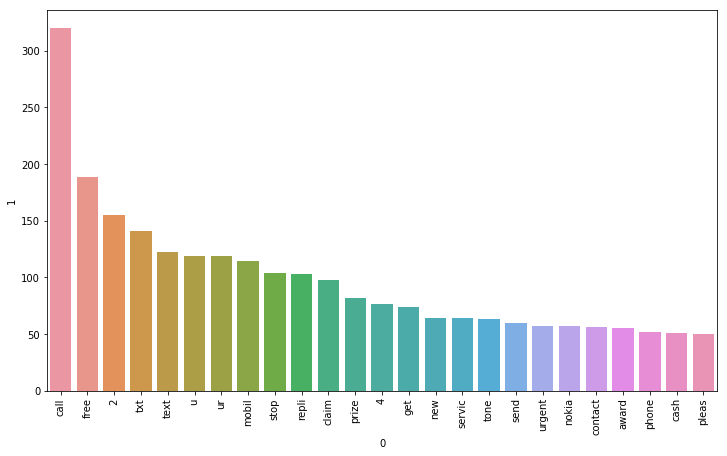

In [67]:
plt.figure(figsize=(12,7))
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam).most_common(25))[0],pd.DataFrame(Counter(spam).most_common(25))[1])
plt.xticks(rotation='vertical')

In [71]:
ham = []
for msg in list(new_df[new_df['Target'] == 0]['Transfrom_text']):
    for word in msg.split():
        ham.append(word)

# Bar plot for most common words in ham messages.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

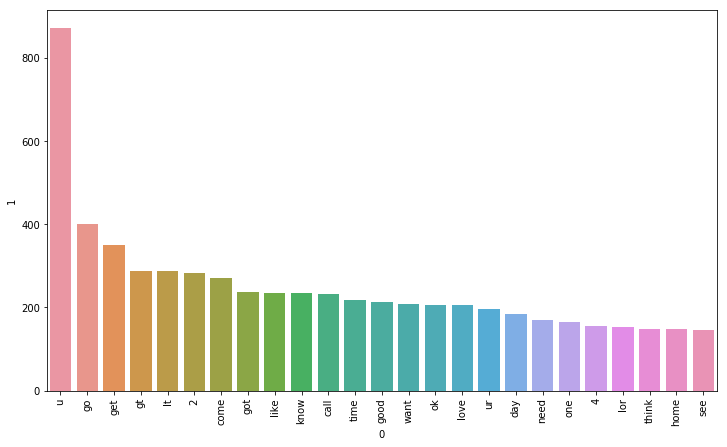

In [75]:
plt.figure(figsize=(12,7))
sns.barplot(pd.DataFrame(Counter(ham).most_common(25))[0],pd.DataFrame(Counter(ham).most_common(25))[1])
plt.xticks(rotation='vertical')
            

# Model Building.

In [76]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
cv = CountVectorizer()

In [77]:
X = cv.fit_transform(new_df['Transfrom_text']).toarray()
y = new_df['Target'].values

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [81]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [82]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)

In [83]:
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.874274661508704
[[786 110]
 [ 20 118]]
0.5175438596491229


In [84]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)

In [85]:
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.965183752417795
[[872  24]
 [ 12 126]]
0.84


In [86]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)

In [87]:
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9709864603481625
[[893   3]
 [ 27 111]]
0.9736842105263158
